In [64]:
%cd ../src
import pickle
import pandas as pd
from utils import IMAGE_TYPES, RDF_DATE_TYPES, RDF_NUMBER_TYPES, POTENTIAL_TEXT_TYPES
import matplotlib.pyplot as plt

e:\00_CODE\03_Master_Thesis\rdf-literal-preprocessing\src


# General Functions

In [65]:
def load_dataset(dataset):
    with open(f"../data/raw/{dataset}_final_torch_None.pickle", "rb") as f:
        data = pickle.load(f)
    
    print("# nodes")
    print(len(data.i2e))
    print("datatypes")
    print(data.datatypes())
    return data

In [66]:
def count_all_nodes(data):
    data_count = {}
    for type in data.datatypes():
        data_count[type] = 0 
    for entry in data.i2e:
        data_count[entry[1]] += 1 
    
    df = pd.DataFrame.from_dict(data_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / len(data.i2e) *100
    df["percent"] = df["percent"].round(2)
    return data_count, df

In [67]:
def grouped_count(data_count):
    grouped_count = {}
    grouped_count['Nodes'] = 0
    grouped_count['IRI'] = 0
    grouped_count['Blank Nodes'] = 0
    grouped_count['Literals'] = 0
    grouped_count['Numbers'] = 0
    grouped_count['Dates'] = 0
    grouped_count['Text'] = 0
    grouped_count['Image'] = 0
    grouped_count['Others'] = 0

    for key, value in data_count.items():
        grouped_count['Nodes'] += value
        if key == 'iri':
            grouped_count['IRI'] += value
        elif key == 'blank_node':
            grouped_count['Blank Nodes'] += value
        else:
            grouped_count['Literals'] += value
            if key in RDF_NUMBER_TYPES:
                grouped_count['Numbers'] += value
            elif key in RDF_DATE_TYPES:
                grouped_count['Dates'] += value
            elif key in IMAGE_TYPES:
                grouped_count['Image'] += value
            elif key in POTENTIAL_TEXT_TYPES:
                grouped_count['Text'] += value
            else:
                grouped_count['Others'] += value
            
    df = pd.DataFrame.from_dict(grouped_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / grouped_count['Nodes'] *100
    df["percent"] = df["percent"].round(2)
    return grouped_count , df

In [68]:
def count_all_triple_types(data):
    triple_counts = {}
    for type in data.datatypes():
        triple_counts[type] = 0 
    for d in data.triples:
        triple_counts[data.i2e[d[2]][1]] += 1 

    
    df = pd.DataFrame.from_dict(triple_counts, orient="index", columns=["count"])
    df["percent"] = df['count'] / len(data.triples) *100
    df["percent"] = df["percent"].round(2)
    return triple_counts, df

In [69]:
def grouped_triple_count(triple_counts):
    grouped_count = {}
    grouped_count['Triples'] = 0
    grouped_count['IRI'] = 0
    grouped_count['Blank Nodes'] = 0
    grouped_count['Literals'] = 0
    grouped_count['Numbers'] = 0
    grouped_count['Dates'] = 0
    grouped_count['Text'] = 0
    grouped_count['Image'] = 0
    grouped_count['Others'] = 0

    for key, value in triple_counts.items():
        grouped_count['Triples'] += value
        if key == 'iri':
            grouped_count['IRI'] += value
        elif key == 'blank_node':
            grouped_count['Blank Nodes'] += value
        else:
            grouped_count['Literals'] += value
            if key in RDF_NUMBER_TYPES:
                grouped_count['Numbers'] += value
            elif key in RDF_DATE_TYPES:
                grouped_count['Dates'] += value
            elif key in IMAGE_TYPES:
                grouped_count['Image'] += value
            elif key in POTENTIAL_TEXT_TYPES:
                grouped_count['Text'] += value
            else:
                grouped_count['Others'] += value
            
    df = pd.DataFrame.from_dict(grouped_count, orient="index", columns=["count"])
    df["percent"] = df['count'] / grouped_count['Triples'] *100
    df["percent"] = df["percent"].round(2)
    return grouped_count , df

In [70]:
def get_class_distribution(data):
    classes, training_counts = data.training[:,1].unique(return_counts=True)
    _, withheld_counts = data.withheld[:,1].unique(return_counts=True)
    return classes, training_counts+withheld_counts
    

In [71]:
class_counts ={}

# amplus

In [72]:
data = load_dataset('amplus')


# nodes
1153221
datatypes
['iri', 'blank_node', 'none', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/2001/XMLSchema#date', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [73]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,459886,39.88
blank_node,566276,49.10
none,55745,4.83
http://kgbench.info/dt#base64Image,56130,4.87
http://www.w3.org/2001/XMLSchema#date,6767,0.59
http://www.w3.org/2001/XMLSchema#decimal,7253,0.63
http://www.w3.org/2001/XMLSchema#positiveInteger,1164,0.10


In [74]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,1153221,100.00
IRI,459886,39.88
Blank Nodes,566276,49.10
Literals,127059,11.02
Numbers,8417,0.73
Dates,6767,0.59
Text,55745,4.83
Image,56130,4.87
Others,0,0.00


In [75]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,1464871,58.11
blank_node,256515,10.17
none,377542,14.98
http://kgbench.info/dt#base64Image,58855,2.33
http://www.w3.org/2001/XMLSchema#date,202304,8.02
http://www.w3.org/2001/XMLSchema#decimal,150342,5.96
http://www.w3.org/2001/XMLSchema#positiveInteger,10617,0.42


In [76]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,2521046,100.00
IRI,1464871,58.11
Blank Nodes,256515,10.17
Literals,799660,31.72
Numbers,160959,6.38
Dates,202304,8.02
Text,377542,14.98
Image,58855,2.33
Others,0,0.00


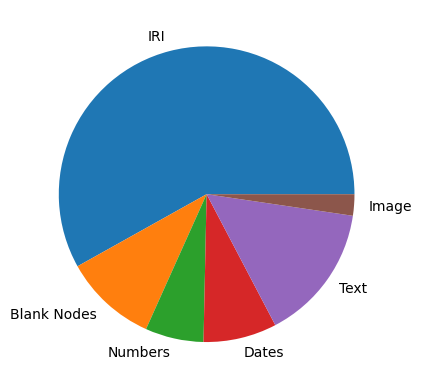

In [77]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<Figure size 640x480 with 0 Axes>

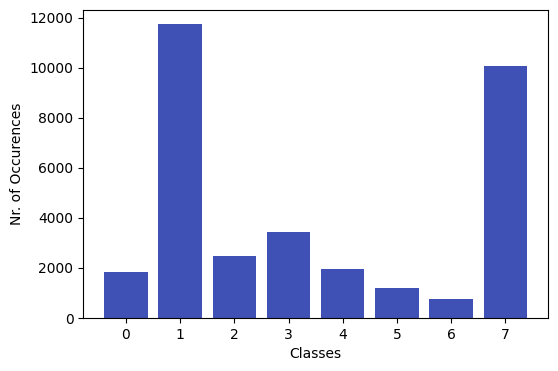

In [78]:
path = '../docs/plots/'
name="amplus_classes"
plt.clf()
plt.figure(figsize=(6, 4))
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts,color=("#3F51B5"))
# plt.figure(dpi=100)
# sns.violinplot(data=scores)
# plt.xticks(ticks=np.linspace(0, len(approaches) - 1,
#             len(approaches), dtype=np.int32), labels=labels)
class_counts['amplus'] = {'classes' : classes,'counts':counts}
plt.ylabel('Nr. of Occurences')
plt.xlabel('Classes')

plt.savefig(f'{path}{name}.pgf', format='pgf', backend='pgf')

In [79]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(11729)
tensor(33423)
tensor(0.3509)


# dmgfull

In [80]:
data = load_dataset('dmgfull')

# nodes
842550
datatypes
['iri', 'none', '@en-gb', '@es', '@fy', '@nl', '@nl-nl', '@pt', '@ru', 'http://kgbench.info/dt#base64Image', 'http://www.opengis.net/ont/geosparql#wktLiteral', 'http://www.w3.org/2001/XMLSchema#anyURI', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://www.w3.org/2001/XMLSchema#gYear', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [81]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,262494,31.15
none,122267,14.51
@en-gb,1,0.00
@es,1,0.00
@fy,17,0.00
@nl,433,0.05
@nl-nl,94553,11.22
@pt,1,0.00
@ru,19,0.00
http://kgbench.info/dt#base64Image,58791,6.98


In [82]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,842550,100.00
IRI,262494,31.15
Blank Nodes,0,0.00
Literals,580056,68.85
Numbers,64647,7.67
Dates,0,0.00
Text,217291,25.79
Image,58791,6.98
Others,239327,28.41


In [83]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,593291,32.06
none,588219,31.79
@en-gb,1,0.00
@es,1,0.00
@fy,17,0.00
@nl,434,0.02
@nl-nl,245553,13.27
@pt,1,0.00
@ru,19,0.00
http://kgbench.info/dt#base64Image,58846,3.18


In [84]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,1850451,100.00
IRI,593291,32.06
Blank Nodes,0,0.00
Literals,1257160,67.94
Numbers,88168,4.76
Dates,0,0.00
Text,834244,45.08
Image,58846,3.18
Others,275902,14.91


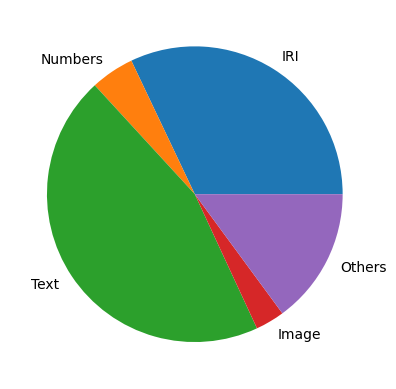

In [85]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<Figure size 640x480 with 0 Axes>

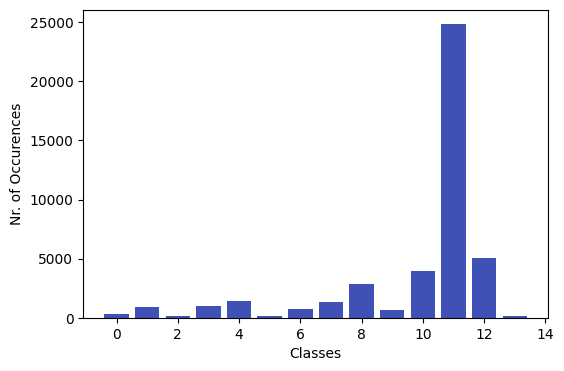

In [86]:
path = '../docs/plots/'
name="dmgfull_classes"
plt.clf()
plt.figure(figsize=(6, 4))
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts,color=("#3F51B5"))
# plt.figure(dpi=100)
# sns.violinplot(data=scores)
# plt.xticks(ticks=np.linspace(0, len(approaches) - 1,
#             len(approaches), dtype=np.int32), labels=labels)
class_counts['dmgfull'] = {'classes' : classes,'counts':counts}
plt.ylabel('Nr. of Occurences')
plt.xlabel('Classes')

plt.savefig(f'{path}{name}.pgf', format='pgf', backend='pgf')

In [87]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(24813)
tensor(43565)
tensor(0.5696)


# dmg777k

In [162]:
data = load_dataset('dmg777k')

# nodes
341270
datatypes
['iri', 'none', '@es', '@fy', '@nl', '@nl-nl', '@pt', '@ru', 'http://kgbench.info/dt#base64Image', 'http://www.opengis.net/ont/geosparql#wktLiteral', 'http://www.w3.org/2001/XMLSchema#anyURI', 'http://www.w3.org/2001/XMLSchema#boolean', 'http://www.w3.org/2001/XMLSchema#gYear', 'http://www.w3.org/2001/XMLSchema#nonNegativeInteger', 'http://www.w3.org/2001/XMLSchema#positiveInteger']


In [163]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,148127,43.40
none,27886,8.17
@es,1,0.00
@fy,11,0.00
@nl,397,0.12
@nl-nl,33721,9.88
@pt,1,0.00
@ru,14,0.00
http://kgbench.info/dt#base64Image,46061,13.50
http://www.opengis.net/ont/geosparql#wktLiteral,20837,6.11


In [164]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,341270,100.00
IRI,148127,43.40
Blank Nodes,0,0.00
Literals,193143,56.60
Numbers,9181,2.69
Dates,0,0.00
Text,62031,18.18
Image,46061,13.50
Others,75870,22.23


In [165]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,288379,37.11
none,190271,24.48
@es,1,0.00
@fy,11,0.00
@nl,398,0.05
@nl-nl,139291,17.92
@pt,1,0.00
@ru,14,0.00
http://kgbench.info/dt#base64Image,46108,5.93
http://www.opengis.net/ont/geosparql#wktLiteral,20866,2.69


In [92]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,777124,100.00
IRI,288379,37.11
Blank Nodes,0,0.00
Literals,488745,62.89
Numbers,10706,1.38
Dates,0,0.00
Text,329987,42.46
Image,46108,5.93
Others,101944,13.12


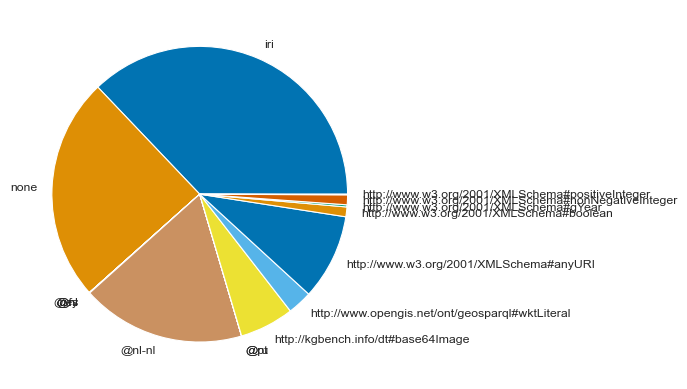

In [166]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

In [ ]:
data.triples[torch.isin(data.triples[:, 1],relevant_relations)]

In [170]:
relevant_relations

[26, 2, 43]

NameError: name 'torch' is not defined

<Figure size 640x480 with 0 Axes>

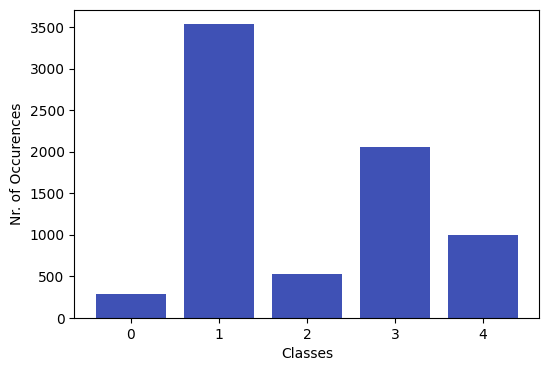

In [94]:
path = '../docs/plots/'
name="dmg777k_classes"
plt.clf()
plt.figure(figsize=(6, 4))
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts,color=("#3F51B5"))
# plt.figure(dpi=100)
# sns.violinplot(data=scores)
# plt.xticks(ticks=np.linspace(0, len(approaches) - 1,
#             len(approaches), dtype=np.int32), labels=labels)
class_counts['dmg777k'] = {'classes' : classes,'counts':counts}
plt.ylabel('Nr. of Occurences')
plt.xlabel('Classes')

plt.savefig(f'{path}{name}.pgf', format='pgf', backend='pgf')

In [95]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())

tensor(3534)
tensor(7395)
tensor(0.4779)


# mdgenre

In [184]:
data = load_dataset('mdgenre')

# nodes
349344
datatypes
['iri', 'http://kgbench.info/dt#base64Image', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#langString', 'http://www.w3.org/2001/XMLSchema#dateTime', 'http://www.w3.org/2001/XMLSchema#decimal', 'http://www.w3.org/2001/XMLSchema#string']


(array([843.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([6.58840027e+01, 9.60000000e+09, 1.92000000e+10, 2.88000000e+10,
        3.84000000e+10, 4.80000000e+10, 5.76000000e+10, 6.72000000e+10,
        7.68000000e+10, 8.64000000e+10, 9.60000000e+10]),
 <BarContainer object of 10 artists>)

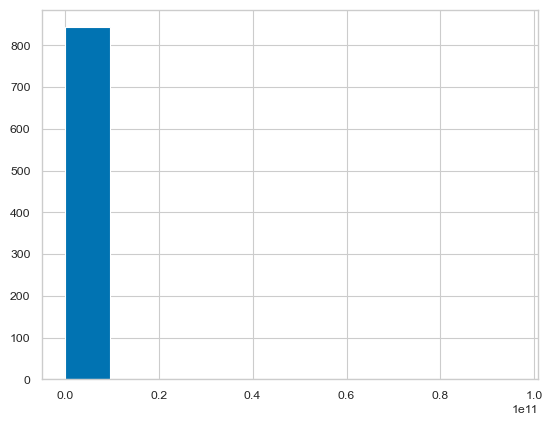

In [185]:
from utils import get_relevant_relations, RDF_NUMBER_TYPES
relevant_relations = get_relevant_relations(data,RDF_NUMBER_TYPES)
from preprocess.binning import encode_number_sublist


In [195]:
for r in relevant_relations:
    print(data.i2r[r])

http://www.wikidata.org/prop/direct/P1971
http://www.wikidata.org/prop/direct/P2047
http://www.wikidata.org/prop/direct/P2142
http://www.wikidata.org/prop/direct/P2130
http://www.wikidata.org/prop/direct/P2067
http://www.wikidata.org/prop/direct/P2048


In [187]:
relevant_relations

[60, 65, 72, 71, 68, 66]

<Figure size 640x480 with 0 Axes>

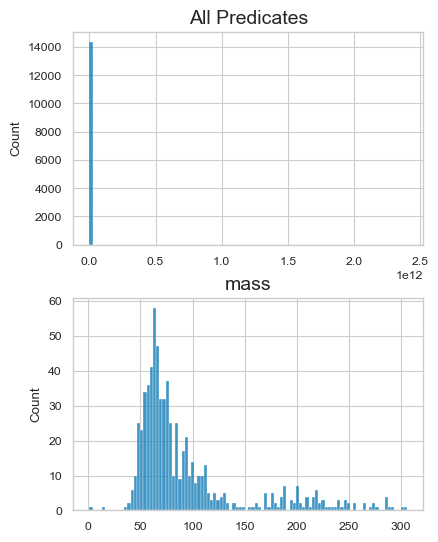

In [215]:
sns.set_theme(context="paper", style="whitegrid",font_scale=1,palette='colorblind')

plot_names = ['All Predicates','mass'] 
plt.clf()
fix, ax = plt.subplots(2, figsize=(3.8, 5.5))
plt.subplots_adjust(left=0.08, right=1, bottom=0.08, top=0.95, wspace=0.22, hspace=0.25)
#plt.tight_layout()
sub_dfs=[]
sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations))],data.i2e)
sub_dfs.append(sub_df)
#ax[i].hist(sub_df[:,1])
sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations[4]))],data.i2e)
sub_dfs.append(sub_df)
#ax[i].hist(sub_df[:,1])
for i in range(2):
    name = plot_names[i]
    #df = pd.DataFrame(class_counts[name])
    #df = df.rename(columns={"classes": "Classes", "counts": "Occurences"})
    #sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations[4]))],data.i2e)
    df=sub_dfs[i]
    sns.histplot(df[:,1],bins=100, ax=ax[i])

    #sns.barplot(df, x="Classes", y="Occurences",ax=ax[i][j])

    ax[i].set_title(name,fontsize=14)




plt.savefig(f'{path}binning_hist.pgf', format='pgf', backend='pgf')

(array([  2., 178., 292.,  99.,  19.,  19.,  31.,  23.,  12.,   9.]),
 array([  1. ,  31.5,  62. ,  92.5, 123. , 153.5, 184. , 214.5, 245. ,
        275.5, 306. ]),
 <BarContainer object of 10 artists>)

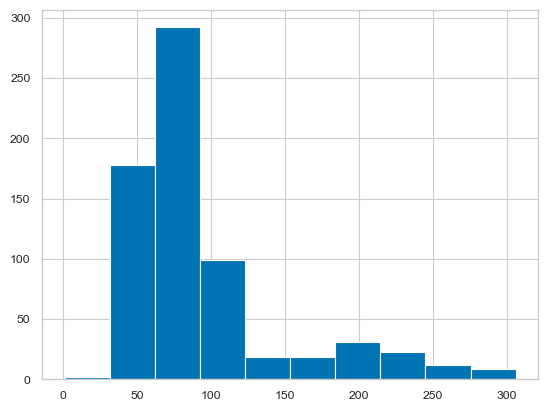

In [194]:
import torch
sub_df = encode_number_sublist(data.triples[torch.isin(data.triples[:, 1],torch.tensor(relevant_relations[4]))],data.i2e)
plt.hist(sub_df[:,1])

In [97]:
dc, df = count_all_nodes(data)
df

,count,percent
iri,191135,54.71
http://kgbench.info/dt#base64Image,67528,19.33
http://www.w3.org/1999/02/22-rdf-syntax-ns#langString,26367,7.55
http://www.w3.org/2001/XMLSchema#dateTime,37442,10.72
http://www.w3.org/2001/XMLSchema#decimal,1387,0.40
http://www.w3.org/2001/XMLSchema#string,25485,7.30


In [98]:
gc, df = grouped_count(dc)
df

,count,percent
Nodes,349344,100.00
IRI,191135,54.71
Blank Nodes,0,0.00
Literals,158209,45.29
Numbers,1387,0.40
Dates,37442,10.72
Text,51852,14.84
Image,67528,19.33
Others,0,0.00


In [99]:
tc, df = count_all_triple_types(data)
df

,count,percent
iri,1001791,80.00
http://kgbench.info/dt#base64Image,67804,5.41
http://www.w3.org/1999/02/22-rdf-syntax-ns#langString,26950,2.15
http://www.w3.org/2001/XMLSchema#dateTime,113462,9.06
http://www.w3.org/2001/XMLSchema#decimal,14352,1.15
http://www.w3.org/2001/XMLSchema#string,27888,2.23


In [100]:
gtc,df = grouped_triple_count(tc)
df

,count,percent
Triples,1252247,100.00
IRI,1001791,80.00
Blank Nodes,0,0.00
Literals,250456,20.00
Numbers,14352,1.15
Dates,113462,9.06
Text,54838,4.38
Image,67804,5.41
Others,0,0.00


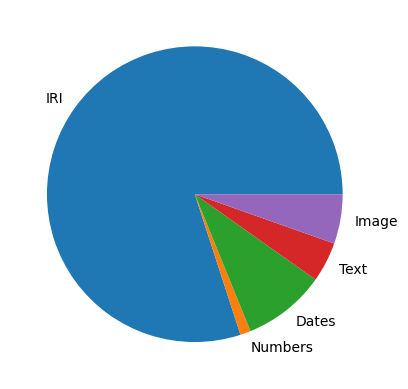

In [101]:
df['id'] = df.index
sub_df = df[(df['count']>0) & (df['id'] != "Triples") & (df['id'] != "Literals")]
plt.pie(sub_df['count'], labels=sub_df['id'])
plt.show()

<Figure size 640x480 with 0 Axes>

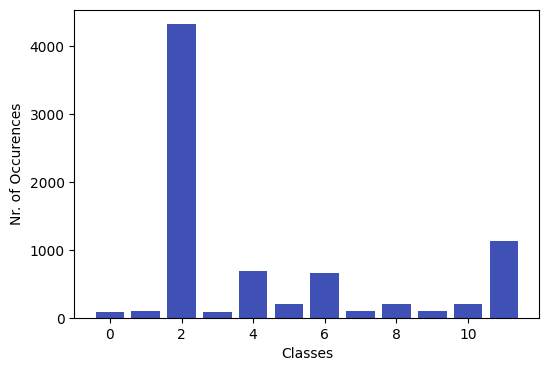

In [102]:
path = '../docs/plots/'
name="mdgenre_classes"
plt.clf()
plt.figure(figsize=(6, 4))
classes, counts = get_class_distribution(data)
plt.bar(x= classes, height= counts,color=("#3F51B5"))
# plt.figure(dpi=100)
# sns.violinplot(data=scores)
# plt.xticks(ticks=np.linspace(0, len(approaches) - 1,
#             len(approaches), dtype=np.int32), labels=labels)
class_counts['mdgenre'] = {'classes' : classes,'counts':counts}
plt.ylabel('Nr. of Occurences')
plt.xlabel('Classes')

plt.savefig(f'{path}{name}.pgf', format='pgf', backend='pgf')

In [103]:
print(counts.max())
print(counts.sum())
print(counts.max()/counts.sum())
counts.median()

tensor(4323)
tensor(7863)
tensor(0.5498)


tensor(198)

In [104]:
counts/counts.sum()*100

tensor([ 1.0174,  1.2082, 54.9790,  1.0174,  8.7371,  2.5436,  8.3810,  1.3481,
         2.6199,  1.2209,  2.5181, 14.4093])

In [105]:
data.withheld[163     ]

tensor([123185,      2])

In [106]:
data.i2e[283258]

('iVBORw0KGgoAAAANSUhEUgAAAC4AAABACAIAAADqJdJKAAAWoElEQVR4nDV5Sazv2XHWV8M5v+k/3Xvf/NzubnfbxmCDrAhFLLAUlIBCoogVkRCwRqyRELCD7JBYIhawQLABiQULFkREiBAICZBISTtx2kPb3f1ev+GO/+E3nKGKxTVnUZuzKH3nVNX3VRX9i28MTZBq3gRRJSFmRspWzdxxHHOt3rbq5teHBQ5VCoFVWYSIiJlADiI3N/OU6jTW/bGMida9dC1vh/DsYddEJsbmGWuPdECefP2cmi3AiOd9d3ahq0faN4GZItA1QgwQxrGU6n2rzNQEMUdQruYidL1fWMiBJVW4hyAhcNOIKqlwjGzVS7K0+JSM2GKULmjX8TBILs5MMJfKS6npBF17aIWYU8plOul60BjYDLmYGYJS16oKx8AAcrF7e3NIXaNPL6S4iXApJkRtK12jbcvrtYhQyS5CqlSKX1/l68NS3AHUChBSsdNtRYDOvMyebhB20qxRc4EdQ2yVQCkbEVRJlYOwA0wQpmo+LVaKC9PQqgqveg2BHD/9jhA4BgJQC2p1M3cHsWuk84tQ3V9dTd0gJdvv/cG+6/XZ+20XWQLahrYPtOk9CGvkdBwzX2upHpRCYCaEyAARYOa52rKYO9pGmCgXEyEAKXut1R3mXquLCDPl7CIIkcy8ZpjB3J3QN+HmLt3s05JrDFJPsIC243bDsSUGWa11We5uM5VF24abKAAcqBXuVovl4g6ocAzi5qwYenWDCFXzGIQFIqRCXUchkjvMQQR3YkKpLsJPHsU28rKULz8d1oNenAcojpPdnqprTdeZBzQrYubDPj98r1VVYgYRMcPhOaMaQuAY2MytAkIipIJSjAXDSmMDVWa59+1uAACHGZhBQk0gNz9NBsY7zwcGmo77FUuH9Zl4RiFbIDVW6SgKrwLOH6z0Pi2r4R5ZCNx17AYHCGTmpcINDl9tJEZuWgJABBaC4x4GEU

In [108]:
cnt_iri = 0
cnt_all = 0
cnt_literal = 0

for t in data.triples[data.triples[:,0]== 283678]:
    if data.i2e[t[2]][1]== 'iri':
        cnt_iri +=1
    else:
        cnt_literal +=1
    cnt_all +=1
    print(f'{data.i2e[t[0]]} - {data.i2r[t[1]]} - {data.i2e[t[2]]}')
#print(f'{cnt_iri}- {cnt_literal} - {cnt_literal/cnt_all}')

In [110]:
cnt_iri = 0
cnt_all = 0
cnt_literal = 0

for t in data.triples[data.triples[:,0]== 284196]:
    if data.i2e[t[2]][1]== 'iri':
        cnt_iri +=1
    else:
        cnt_literal +=1
    cnt_all +=1
    print(f'{data.i2e[t[0]]} - {data.i2r[t[1]]} - {data.i2e[t[2]]}')
#print(f'{cnt_iri}- {cnt_literal} - {cnt_literal/cnt_all}')

In [111]:
from preprocess.binning import bin_numbers


In [112]:
data = bin_numbers(data, num_bins=5, num_bins_as_percent=True)

1
13
40
12
7
8


In [127]:
pd.DataFrame(class_counts['amplus'])

,classes,counts
0,0,1818
1,1,11729
2,2,2462
3,3,3421
4,4,1968
5,5,1206
6,6,738
7,7,10081


In [125]:
pd.DataFrame([class_counts["amplus"]['classes'],class_counts["amplus"]['counts']], columns=['classes',"counts"])

ValueError: 2 columns passed, passed data had 8 columns

<AxesSubplot: xlabel='classes', ylabel='counts'>

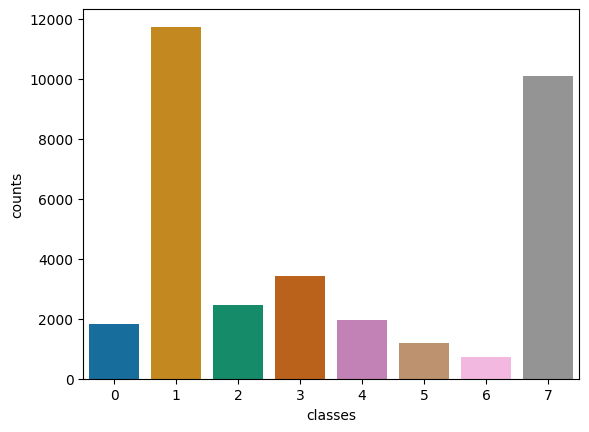

In [133]:
import seaborn as sns
sns.barplot(pd.DataFrame(class_counts['amplus']), x="classes", y="counts", palette=sns.color_palette("colorblind"))

In [ ]:
so.barplot

In [138]:
df

,count,percent,id
Triples,1252247,100.00,Triples
IRI,1001791,80.00,IRI
Blank Nodes,0,0.00,Blank Nodes
Literals,250456,20.00,Literals
Numbers,14352,1.15,Numbers
Dates,113462,9.06,Dates
Text,54838,4.38,Text
Image,67804,5.41,Image
Others,0,0.00,Others


# overall

<Figure size 640x480 with 0 Axes>

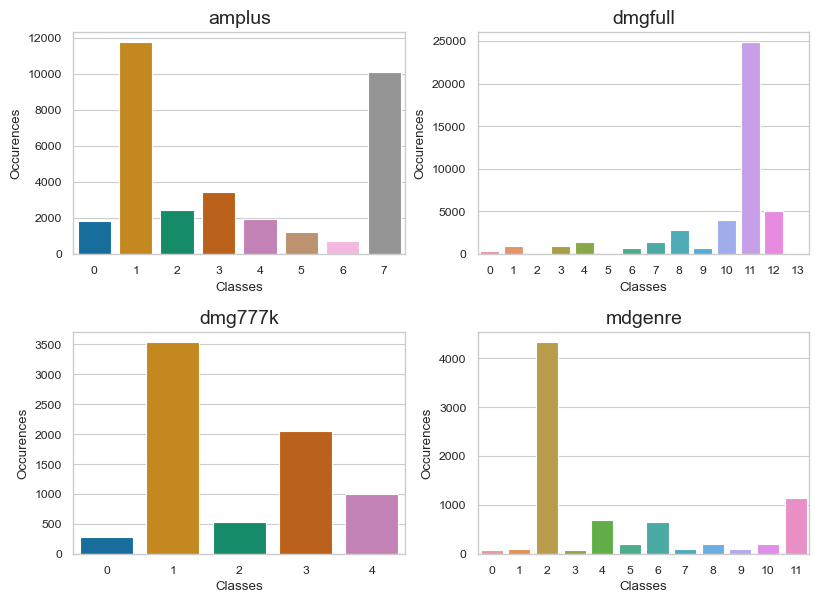

In [161]:
sns.set_theme(context="paper", style="whitegrid",font_scale=1,palette='colorblind')

plot_names = [['amplus','dmgfull'],['dmg777k','mdgenre']] 
plt.clf()
fix, ax = plt.subplots(2,2, figsize=(8, 6))
plt.subplots_adjust(left=0.08, right=1, bottom=0.08, top=0.95, wspace=0.22, hspace=0.35)
#plt.tight_layout()

for i in range(2):
    for j in range(2):
        name = plot_names[i][j]
        df = pd.DataFrame(class_counts[name])
        df = df.rename(columns={"classes": "Classes", "counts": "Occurences"})
        sns.barplot(df, x="Classes", y="Occurences",ax=ax[i][j])
        #ax[i][j].bar(x= class_counts[name]['classes'], height= class_counts[name]['counts'],color=("#7986CB"))
        # ax[i][j].ylabel('Nr. of Occurences')
        # ax[i][j].xlabel('Classes')
        ax[i][j].set_title(name,fontsize=14)
        #ax[i][j].set(xlabel='Classes', ylabel='Nr. of Occurences', xticks=class_counts[name]['classes'])

# for a in ax.flat:
#     a.set(xlabel='Classes', ylabel='Nr. of Occurences')
# path = '../docs/plots/'
# name="mdgenre_classes"
# plt.clf()
# plt.figure(figsize=(6, 4))
# classes, counts = get_class_distribution(data)
# plt.bar(x= classes, height= counts,color=("#3F51B5"))
# plt.figure(dpi=100)
# sns.violinplot(data=scores)
# plt.xticks(ticks=np.linspace(0, len(approaches) - 1,
#             len(approaches), dtype=np.int32), labels=labels)
# class_counts['mdgenre'] = {'classes' : classes,'counts':counts}
# plt.ylabel('Nr. of Occurences')
# plt.xlabel('Classes')

plt.savefig(f'{path}all_classes.pgf', format='pgf', backend='pgf')
